In [ ]:
#Import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt

rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [ ]:
#Data retrieval
import os, requests

fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)

#fname.append('steinmetz_st.npz')

url = []
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")
# #url.append("https://osf.io/4bjns/download")


for j in range(len(url)):
   if not os.path.isfile(fname[j]):
     try:
       r = requests.get(url[j])
     except requests.ConnectionError:
        print("!!! Failed to download data !!!")
   else:
     if r.status_code != requests.codes.ok:
         print("!!! Failed to download data !!!")
 #     else:
    #      with open(fname[j], "wb") as fid:
    #        fid.write(r.content)


NameError: name 'r' is not defined

In [ ]:
# Data loading
import os, requests

fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)

import numpy as np

alldat = np.array([])
for j in fname[0:3]:
 
  alldat = np.hstack((alldat, np.load(j, allow_pickle=True)['dat']))


In [ ]:
#alldat contains 39 sessions from 10 mice, data from Steinmetz et al, 2019. Time bins for all measurements are 10ms, starting 500ms before stimulus onset. The mouse had to determine which side has the highest contrast. For each dat = alldat[k], you have the fields below. For extra variables, check out the extra notebook and extra data files (lfp, waveforms and exact spike times, non-binned).
# dat['mouse_name']: mouse name
# dat['date_exp']: when a session was performed
# dat['spks']: neurons by trials by time bins.
# dat['brain_area']: brain area for each neuron recorded.
# dat['ccf']: Allen Institute brain atlas coordinates for each neuron.
# dat['ccf_axes']: axes names for the Allen CCF.
# dat['contrast_right']: contrast level for the right stimulus, which is always contralateral to the recorded brain areas.
# dat['contrast_left']: contrast level for left stimulus.
# dat['gocue']: when the go cue sound was played.
# dat['response_times']: when the response was registered, which has to be after the go cue. The mouse can turn the wheel before the go cue (and nearly always does!), but the stimulus on the screen won't move before the go cue.
# dat['response']: which side the response was (-1, 0, 1). When the right-side stimulus had higher contrast, the correct choice was -1. 0 is a no go response.
# dat['feedback_time']: when feedback was provided.
# dat['feedback_type']: if the feedback was positive (+1, reward) or negative (-1, white noise burst).
# dat['wheel']: turning speed of the wheel that the mice uses to make a response, sampled at 10ms.
# dat['pupil']: pupil area (noisy, because pupil is very small) + pupil horizontal and vertical position.
# dat['face']: average face motion energy from a video camera.
# dat['licks']: lick detections, 0 or 1.
# dat['trough_to_peak']: measures the width of the action potential waveform for each neuron. Widths <=10 samples are "putative fast spiking neurons".
# dat['%X%_passive']: same as above for X = {spks, pupil, wheel, contrast_left, contrast_right} but for passive trials at the end of the recording when the mouse was no longer engaged and stopped making responses.
# dat['prev_reward']: time of the feedback (reward/white noise) on the previous trial in relation to the current stimulus time.
# dat['reaction_time']: ntrials by 2. First column: reaction time computed from the wheel movement as the first sample above 5 ticks/10ms bin. Second column: direction of the wheel movement (0 = no move detected).

In [ ]:
#Make a plot of which brain areas are present in each dataset
regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia", "cortical subplate", "other"]
region_colors = ['blue', 'red', 'green', 'darkblue', 'violet', 'lightblue', 'orange', 'gray']
brain_groups = [["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"], # visual cortex
                ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT", "RT", "SPF", "TH", "VAL", "VPL", "VPM"], # thalamus
                ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"], # hippocampal
                ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", "ORBm", "PIR", "PL", "SSp", "SSs", "RSP","TT"], # non-visual cortex
                ["APN", "IC", "MB", "MRN", "NB", "PAG", "RN", "SCs", "SCm", "SCig", "SCsg", "ZI"], # midbrain
                ["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"], # basal ganglia 
                ["BLA", "BMA", "EP", "EPd", "MEA"] # cortical subplate
                ]

In [ ]:
# Plot Spikes by session 

session = 0 
trial = 0
neuron = range(10)


plt.eventplot(vis_ctx_spikes[0] ])  # add neuron as first argument and trial as second argument
plt.show()

SyntaxError: invalid syntax (1017558289.py, line 8)

['vis ctx',
 'thal',
 'hipp',
 'other ctx',
 'midbrain',
 'basal ganglia',
 'cortical subplate',
 'other']

In [ ]:
# Getting spikes for one session in vis_ctx
vis_ctx_spikes = []
brain_area_data = []
contrast_right = []
pupil_area = []
contrast_left = []
response_times = []
reaction_times = []
#vis_ctx_spike_time = []
for i in range(39):
  dat = alldat[i]
  region = brain_groups[0] # vis_ctx
  index_vis = [ind for ind , j in enumerate(dat['brain_area']) if j == "VISp"]
  brain_area_data.append(index_vis)
  
  response_times.append(dat['response_time'])
  reaction_times.append(dat['reaction_time'])
  pupil_area.append(dat['pupil'][0 , : , :])
  if dat['spks'][index_vis].shape[0] != 0 : 
    vis_ctx_spikes.append(dat['spks'][index_vis]) 
    contrast_right.append(dat['contrast_right'])
    contrast_left.append(dat['contrast_left'])
  
 

In [ ]:
for i in vis_ctx_spikes:
        print(i.shape)

    #neurons, trials, time bins

(178, 214, 250)
(114, 228, 250)
(39, 249, 250)
(48, 250, 250)
(105, 447, 250)
(66, 340, 250)
(42, 268, 250)
(122, 235, 250)
(133, 444, 250)
(94, 261, 250)
(162, 178, 250)
(15, 343, 250)


(379, 250)


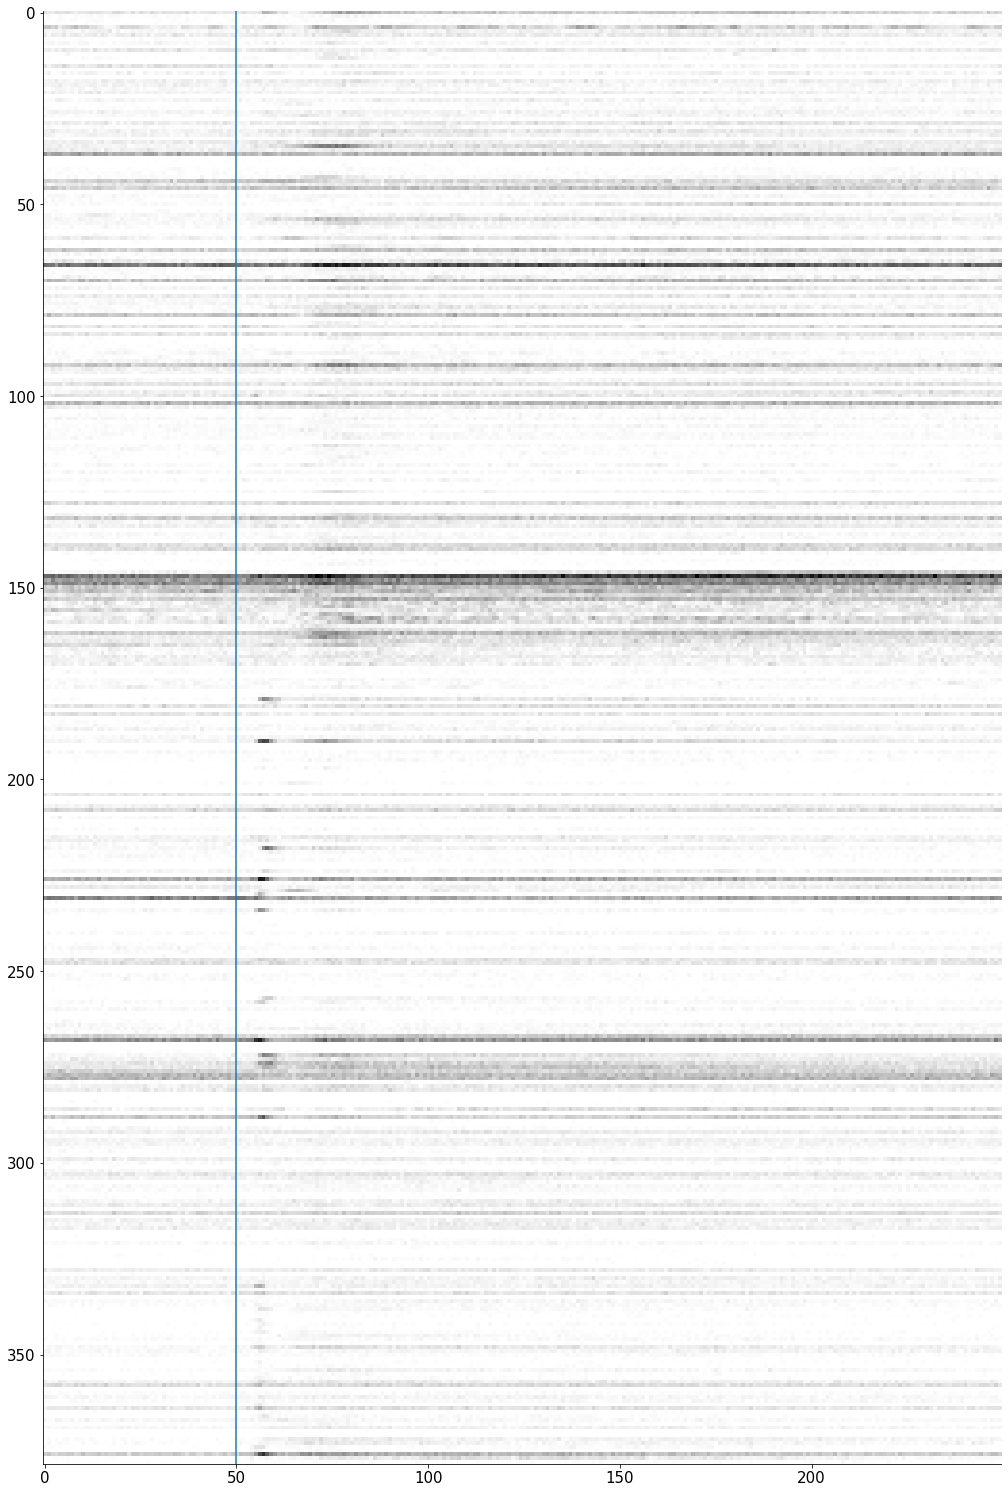

In [ ]:
mean_across_trials = np.vstack([np.mean(vis_ctx_spikes[j], axis=1) for j in range(0,4)])

print(mean_across_trials.shape)# all the 4 sessions of time points
fig = plt.figure(figsize=(21,21))
plt.imshow(mean_across_trials, cmap="gray_r")
plt.axvline([50])
plt.show()
#          time_bin1        time_bin2     time_bin3
#neuron1
#neuron2
#neuron3
#neuron4

In [ ]:
[13213, 2]
[12313, 1]
[4234, 0]


[(1.9442231075697212, 0), (4.01593625498008, 1), (0.23107569721115537, 2), (0.7051792828685259, 3), (33.0398406374502, 4), (8.0398406374502, 5), (4.617529880478088, 6), (12.693227091633467, 7), (0.2788844621513944, 8), (61.219123505976086, 9), (1.9362549800796813, 10), (14.565737051792828, 11), (1.49800796812749, 12), (0.8087649402390438, 13), (0.38247011952191234, 14), (0.18725099601593626, 15), (17.49003984063745, 16), (28.458167330677288, 17), (12.92430278884462, 18), (4.768924302788845, 19), (7.079681274900398, 20), (23.10756972111554, 21), (2.143426294820717, 22), (1.0119521912350598, 23), (2.7171314741035855, 24), (7.812749003984063, 25), (2.908366533864542, 26), (1.1633466135458166, 27), (0.35059760956175295, 28), (36.19521912350598, 29), (0.23107569721115537, 30), (44.15139442231076, 31), (0.3745019920318725, 32), (6.187250996015936, 33), (2.0239043824701195, 34), (3.199203187250996, 35), (0.250996015936255, 36), (0.6812749003984063, 37), (0.7131474103585657, 38), (10.095617529

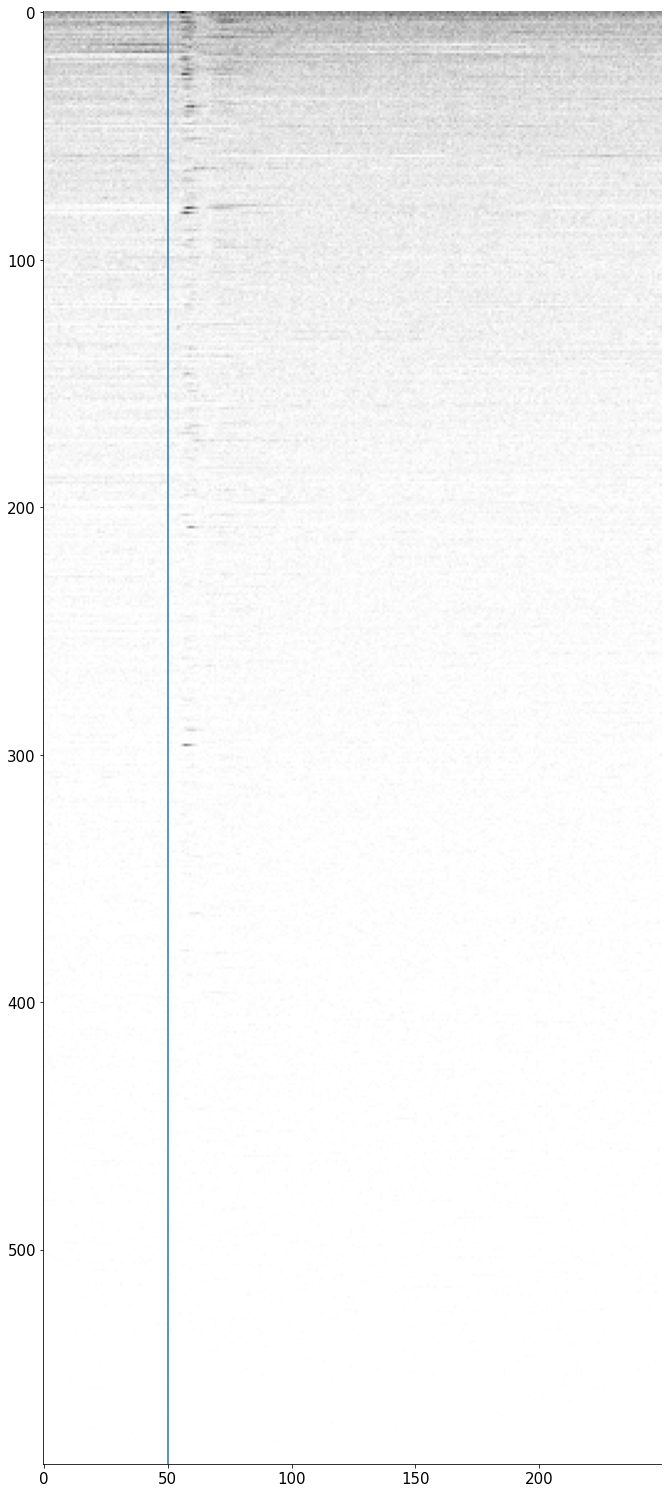

In [ ]:
mean_across_trials = np.vstack([np.mean(vis_ctx_spikes[j], axis=1) for j in range(0,4)])
total_act = np.sum(mean_across_trials, axis=1)
sorted_idxs = [x for _, x in sorted(zip(total_act, np.arange(0, mean_across_trials.shape[0])),reverse=True)]
fig = plt.figure(figsize=(21,21))
plt.imshow(mean_across_trials[sorted_idxs], cmap="gray_r")
plt.axvline([50])
plt.show()

In [ ]:
a = vis_ctx_spikes[0]
b = np.transpose(a, (1, 0, 2))
c = b.reshape( b.shape[0] , -1)

In [ ]:
def visualize_components(component1, component2,  show=True):
  """
  Plots a 2D representation of the data for visualization with categories
  labelled as different colors.

  Args:
    component1 (numpy array of floats) : Vector of component 1 scores
    component2 (numpy array of floats) : Vector of component 2 scores
    labels (numpy array of floats)     : Vector corresponding to categories of
                                         samples

  Returns:
    Nothing.

  """

  plt.figure()
  cmap = plt.cm.get_cmap('tab10')
  plt.scatter(x=component1, y=component2,  cmap=cmap)
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.colorbar(ticks=range(10))
  plt.clim(-0.5, 9.5)
  if show:
    plt.show()

In [ ]:
vis_left = np.concatenate(contrast_left)
vis_right = np.concatenate(contrast_right)
pc1 = scores.T[0]
pc1.shape
#pc1[np.logical_and(vis_left==0, vis_right>0)].shape
a = np.where(np.logical_and(vis_left==0 , vis_right>0) == True)
a


(array([  7,  10,  11,  13,  21,  22,  23,  25,  30,  41,  43,  44,  54,
         60,  65,  79,  83,  85,  90,  91,  92, 100, 111, 112, 130, 131,
        149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
        162, 163, 165, 178, 179, 180, 188, 189, 190, 193, 200, 202, 204,
        207, 210, 216, 217, 218, 231, 235, 236, 244, 245, 246, 247, 248,
        249, 250, 251, 258, 260, 273, 282, 286, 288, 290, 314, 326, 327,
        346, 347, 368, 369, 375, 382, 385, 386, 394, 401, 403, 404, 410,
        418, 421, 422, 426, 436, 442, 458, 462, 466, 467, 476, 478, 480,
        481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493,
        494, 495, 496, 497, 501, 506, 512, 514, 519, 524, 525, 529, 530,
        540, 542, 545, 546, 551, 562, 566, 567, 568, 572, 575, 577, 595,
        613, 615, 623, 624, 625, 626, 627, 628, 630, 633, 639, 641, 642,
        674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686,
        688, 690, 692, 695, 696, 701, 714, 716, 719

(379, 3)


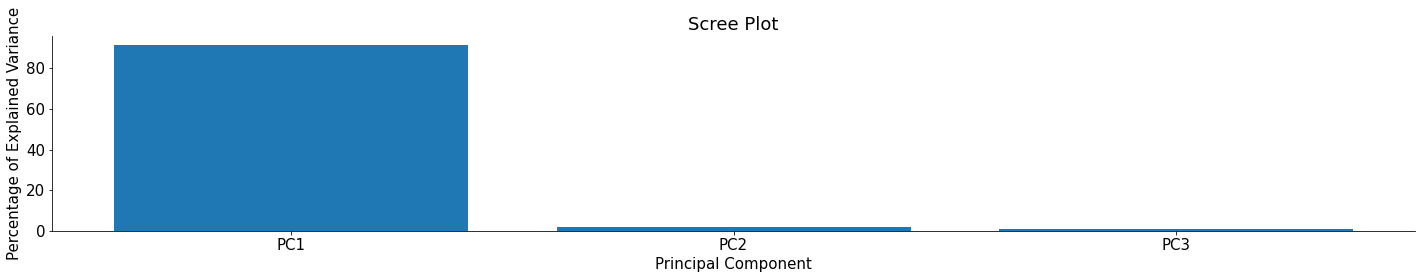

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

# Initializes PCA
scaled_data = preprocessing.scale(mean_across_trials)
pca_model = PCA(n_components=3)

# Performs PCA
pca_model.fit(scaled_data)

#Transform 
scores = pca_model.transform(mean_across_trials)
print(scores.shape)

per_var = np.round(pca_model.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()







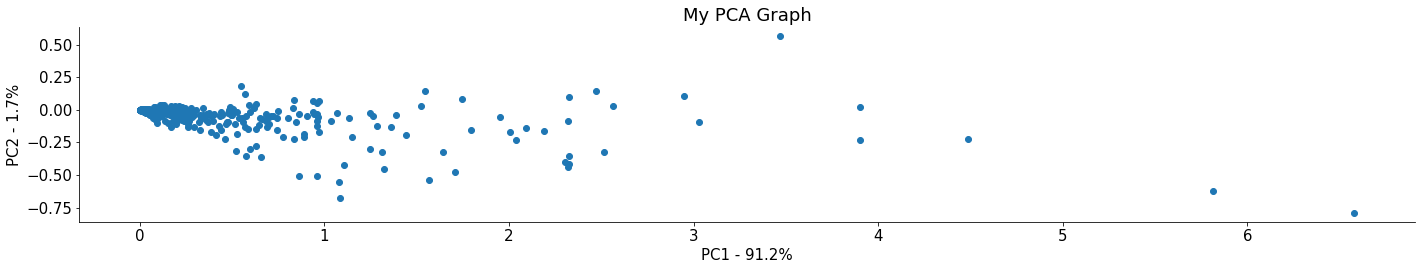

In [ ]:
import pandas as pd

pca_df = pd.DataFrame(scores, columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
#for sample in pca_df.index:
 #   plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  import sys
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/pylabtools.py:134: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


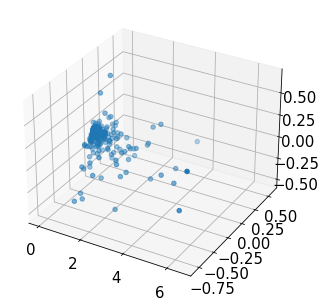

In [ ]:
#3D plotting of the first three principal components

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random
fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = pca_df.PC1
sequence_containing_y_vals = pca_df.PC2
sequence_containing_z_vals = pca_df.PC3


ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
pyplot.show()

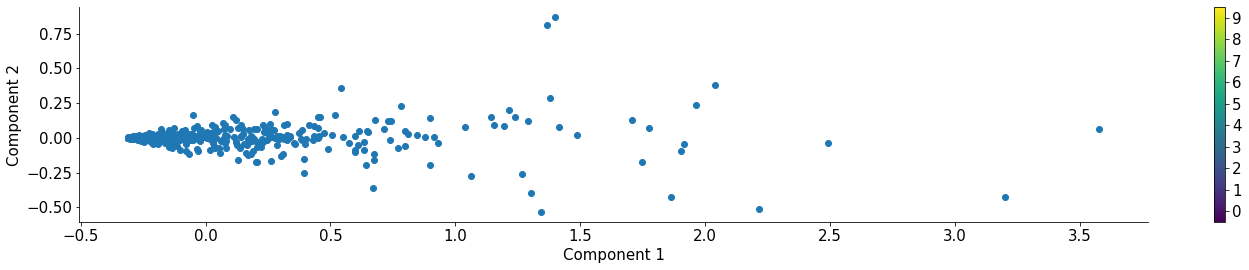

In [ ]:
visualize_components(scores[: , 0] , scores[: , 1])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f61ff418-f78f-4b42-b416-d4f62a50c767' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>